# Political Alignment Case Study

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)


### Introduction

This notebook is a template for a do-it-yourself, choose-your-own-adventure mini-project that explores the relationship between political alignment and other attitudes and beliefs.

I will outline the steps and provide sample code.  You can choose which survey question to explore, adapt my code for your data, and write a report presenting the results.

In previous notebooks, we looked at changes in political alignment over time, and explored the relationship between political alignment and survey questions related to "outlook".

The analysis in this notebook follows the steps we have seen:

1) For your variable of interest, you will read the code book to understand the question and valid responses.

2) You will compute and display the distribution (PMF) of responses and the distribution within each political group.

3) You will recode the variable on a numerical scale that makes it possible to interpret the mean, and then plot the mean over time.

4) You will use a pivot table to compute the mean of your variable over time for each political alignment group (liberal, moderate, and conservative).

5) Finally, you will look at results from three resamplings of the data to see whether the patterns you observed might be due to random sampling.

### Setup

If you are running this notebook in Colab, the following cell installs the `empiricaldist` library.

If you are running in another environment, you will need to install it yourself.

In [ ]:
# If we're running in Colab, set up the environment

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=b2e9976e4f43a26588eef58705f3631bfa95439a38fbf4188cb5e8eec62c8991
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


If everything we need is installed, the following cell should run without error.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf

The following cells define functions from previous notebooks we will use again.

In [ ]:
def values(series):
    """Count the values and sort.
    
    series: pd.Series
    
    returns: series mapping from values to frequencies
    """
    return series.value_counts().sort_index()

In [ ]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    plt.gca().set(**options)
    plt.tight_layout()

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    """Use LOWESS to compute a smooth line.
    
    series: pd.Series
    
    returns: pd.Series
    """
    y = series.values
    x = series.index.values

    smooth = lowess(y, x)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=index) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_series_lowess(series, color):
    """Plots a series of data points and a smooth line.
    
    series: pd.Series
    color: string or tuple
    """
    series.plot(linewidth=0, marker='o', color=color, alpha=0.5)
    smooth = make_lowess(series)
    smooth.plot(label='_', color=color)

In [ ]:
def plot_columns_lowess(table, columns, color_map):
    """Plot the columns in a DataFrame.
    
    table: DataFrame with a cross tabulation
    columns: list of column names, in the desired order
    color_map: mapping from column names to color_map
    """
    for col in columns:
        series = table[col]
        plot_series_lowess(series, color_map[col])

### Loading the data

In the first notebook, we downloaded GSS data, loaded and cleaned it, resampled it to correct for stratified sampling, and then saved the data in an HDF5 file, which is much faster to load.

The following cells downloads the file.

In [ ]:
# Load the data file

import os

datafile = 'gss_eda.3.hdf5'
if not os.path.exists(datafile):
    !wget https://github.com/AllenDowney/PoliticalAlignmentCaseStudy/raw/master/gss_eda.3.hdf5


Now I'll load one of the resampled DataFrames.

In [ ]:
gss = pd.read_hdf(datafile, 'gss0')
gss.shape

(64814, 169)

## Changes in social attitudes

The General Social Survey includes questions about a variety of social attitudes and beliefs.  We can use this dataset to explore changes in the responses over time and the relationship with political alignment.

In my subset of the GSS data, I selected questions that were asked repeatedly over the interval of the survey.  [You can see the variables I chose on the GSS web site](https://gssdataexplorer.norc.org/projects/52787/variables/data_cart).

To do the exercises in this notebook, you should choose a variable that you think might be interesting.

I will walk you through a process for exploring the variable you choose, but you should feel free to ignore my suggestions if you have a better idea.

If you are not sure which variable to explore, here is a [random selection of three that you can choose from](https://en.wikipedia.org/wiki/The_Paradox_of_Choice):

In [ ]:
cols = list(gss.columns)
for col in ['ballot', 'id_', 'year']:
    cols.remove(col)
    
np.random.shuffle(cols)
for col in cols[:3]:
    print(col)

spkath
hapmar
reg16




1.   List item
2.   List item


## Attitudes about Premarital sex

As my Project 1, I will look at responses to the following [question related to attitudes about having sex relations before marriage](https://gssdataexplorer.norc.org/variables/631/vshow).

>There's been a lot of discussion about the way morals and attitudes about sex are changing in this country. If a man and woman have sex relations before marriage, do you think it is always wrong, almost always wrong, wrong only
sometimes, or not wrong at all?

The valid responses are:

```
1	Always wrong
2	Almost always wrong
3	Sometimes wrong
4	Not wrong at all
```

Here's the distribution of responses:

In [ ]:
values(gss['premarsx'])

1.0    10145
2.0     3518
3.0     7887
4.0    17012
Name: premarsx, dtype: int64

And here's what the distribution looks like.

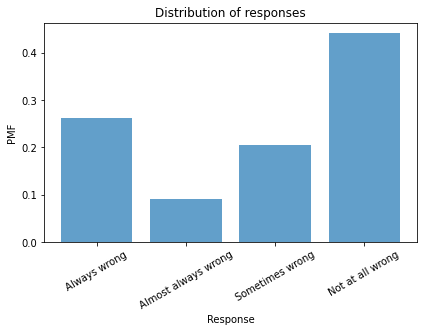

In [ ]:
pmf = Pmf.from_seq(gss['premarsx'])
pmf.bar(alpha=0.7)

decorate(xlabel='Response',
         ylabel='PMF',
         title='Distribution of responses')

responses = [1, 2, 3, 4]

labels = ['Always wrong',
          'Almost always wrong',
          'Sometimes wrong',
          'Not at all wrong']

plt.xticks(responses, labels, rotation=30);

Interpretation: 

When you write your report, you should add a few sentences here to interpret the results you get for your variable.

But remember that the results are an average over the entire interval of the survey, so you should not interpet it as a current condition.

## Responses over time

If we make a cross tabulation of `year` and the variable of interest, we get the distribution of responses over time.

In [ ]:
xtab = pd.crosstab(gss['year'], gss['premarsx'], normalize='index')
xtab.head()

premarsx,1.0,2.0,3.0,4.0
year,,,,
1972,0.361147,0.114081,0.257497,0.267275
1974,0.335430,0.124389,0.236198,0.303983
1975,0.291344,0.131597,0.253343,0.323716
1977,0.301480,0.096904,0.241588,0.360027
1978,0.288385,0.138184,0.199599,0.373832


In [ ]:
xtab.tail()

premarsx,1.0,2.0,3.0,4.0
year,,,,
2010,0.217391,0.083272,0.175387,0.523950
2012,0.219453,0.049839,0.167203,0.563505
2014,0.197855,0.052443,0.162098,0.587604
2016,0.196986,0.061356,0.131324,0.610334
2018,0.178840,0.064164,0.135154,0.621843


Now we can plot the results.

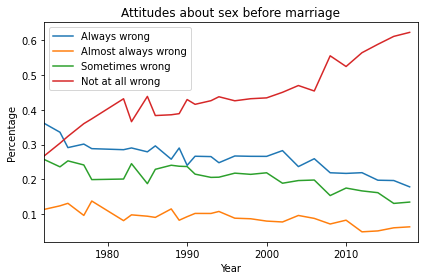

In [ ]:
for response, label in zip(responses, labels):
    xtab[response].plot(label=label)

decorate(xlabel='Year',
         ylabel='Percentage',
         xlim=[1972, 2019],
         title='Attitudes about sex before marriage')

plt.legend();

My Report

When you write your report, you should add a few sentences here to interpret the results you get for your variable.

## Political alignment

To explore the relationship between this variable and political alignment, I'll recode political alignment into three groups:

In [ ]:
d_polviews = {1: 'Liberal', 
              2: 'Liberal', 
              3: 'Liberal', 
              4: 'Moderate', 
              5: 'Conservative', 
              6: 'Conservative', 
              7: 'Conservative'}

I'll use `replace`, as we've seen before, and store the result as a new column in the DataFrame.

In [ ]:
gss['polviews3'] = gss['polviews'].replace(d_polviews)

With this scale, there are roughly the same number of people in each group.

In [ ]:
values(gss['polviews3'])

Conservative    19129
Liberal         14979
Moderate        21444
Name: polviews3, dtype: int64

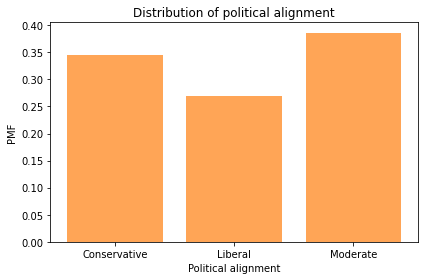

In [ ]:
pmf = Pmf.from_seq(gss['polviews3'])
pmf.bar(color='C1', alpha=0.7)

decorate(xlabel='Political alignment',
         ylabel='PMF',
         title='Distribution of political alignment')

## Group by political alignment

Now we can use `groupby` to group the respondents by political alignment.

In [ ]:
by_polviews = gss.groupby('polviews3')

Next I will plot the distribution of responses in each group.

But first I'll make a dictionary that maps from each group to a color.

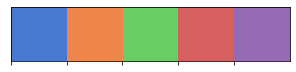

In [ ]:
muted = sns.color_palette('muted', 5)
sns.palplot(muted)

In [ ]:
color_map = {'Conservative': muted[3], 
              'Moderate': muted[4], 
               'Liberal': muted[0]}

Now I'll make a PMF of responses for each group.

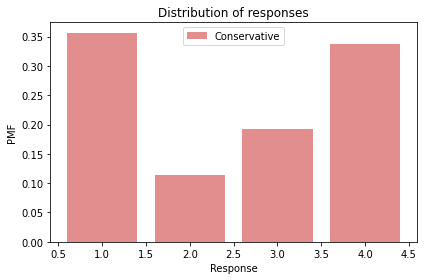

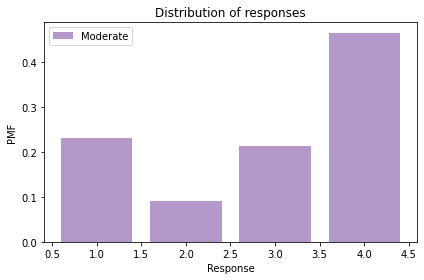

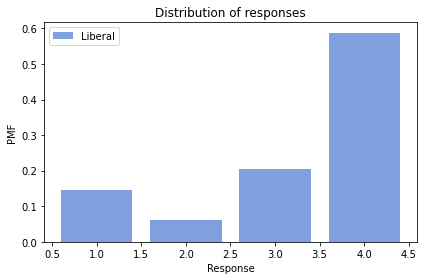

In [ ]:
for name in color_map:
    group = by_polviews.get_group(name)
    
    plt.figure()
    pmf = Pmf.from_seq(group['premarsx'])
    pmf.bar(label=name, color=color_map[name], alpha=0.7)
    
    decorate(xlabel='Response',
             ylabel='PMF',
             title='Distribution of responses')
    
    plt.legend()

When you write your report, you should add a few sentences here to interpret the results.

But again, the results are an average over the entire interval of the survey, so you should not interpet it as a current condition.

## Recode

For each group, we could compute the mean of the responses, but it would be hard to interpret. So we'll recode the variable of interest to make the mean more... meaningful.

For the variable I chose, a majority of respondents chose "always wrong".  I'll use that as my baseline response with code 1, and lump the other responses with code 0.

In [ ]:
d_recode = {1:0, 2:0, 3:0, 4:1}

We can use `replace` to recode the values and store the result as a new column in the DataFrame.

In [ ]:
gss['recoded'] = gss['premarsx'].replace(d_recode)

And we'll use `values` to check whether it worked.

In [ ]:
values(gss['recoded'])

0.0    21550
1.0    17012
Name: recoded, dtype: int64

Now if we compute the mean, we can interpret it as "the fraction of respondents who think same-sex sexual relations are always wrong".

In [ ]:
gss['recoded'].mean()

0.4411596953868866

## Average by group



Now we can compute the mean of the recoded variable in each group.

In [ ]:
means = by_polviews['recoded'].mean()
means

polviews3
Conservative    0.337275
Liberal         0.587758
Moderate        0.465488
Name: recoded, dtype: float32

To get the values in a particular order, we can use the group names as an index:

In [ ]:
names = color_map.keys()
names

dict_keys(['Conservative', 'Moderate', 'Liberal'])

In [ ]:
means[names]

polviews3
Conservative    0.337275
Moderate        0.465488
Liberal         0.587758
Name: recoded, dtype: float32

Now we can make a bar plot with color-coded bars:

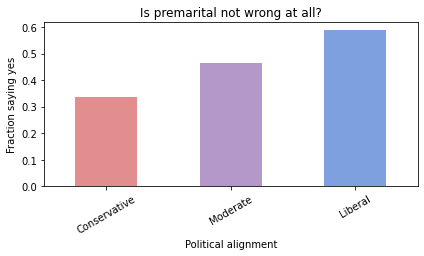

In [ ]:
colors = color_map.values()

means[names].plot(kind='bar', color=colors, alpha=0.7)

decorate(xlabel='Political alignment',
         ylabel='Fraction saying yes',
         title='Is premarital not wrong at all?')

plt.xticks(rotation='30');

When you write your report, you should add a few sentences here to interpret the results you get for your variable.

## Time series

As we saw in previous notebooks, we can use `groupby` to group responses by year.

In [ ]:
by_year = gss.groupby('year')

From the result we can select the recoded variable and compute the mean.

In [ ]:
time_series = by_year['recoded'].mean()

And we can plot the results with the data points themselves as circles and a local regression model as a line.

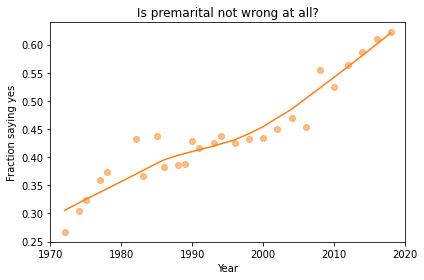

In [ ]:
plot_series_lowess(time_series, 'C1')

decorate(xlabel='Year',
         ylabel='Fraction saying yes',
         xlim=[1970, 2020],
         title='Is premarital not wrong at all?')

Again, you should add some text here to interpret the results you get for your variable.

## Time series by group

So far, we have grouped by `polviews3` and computed the mean of the variable of interest in each group.

Then we grouped by `year` and computed the mean for each year.

Now we'll use `pivot_table` to compute the mean in each group for each year.

In [ ]:
table = gss.pivot_table(values='recoded', 
                        index='year', 
                        columns='polviews3', 
                        aggfunc='mean')

The result is a table that has years running down the rows and political alignment running across the columns.

Each entry in the table is the mean of the variable of interest for a given group in a given year.

In [ ]:
table.head()

polviews3,Conservative,Liberal,Moderate
year,,,
1974,0.211905,0.404598,0.299228
1975,0.246851,0.408776,0.334638
1977,0.242081,0.471429,0.364747
1978,0.261339,0.515663,0.373162
1982,0.346225,0.550980,0.420970


## Plotting the results

Now we can use `plot_columns_lowess` to see the results.

In [ ]:
columns = ['Conservative', 'Moderate', 'Liberal']

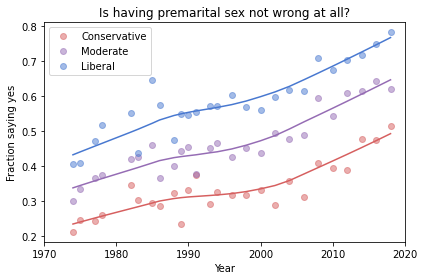

In [ ]:
plot_columns_lowess(table, columns, color_map)

decorate(xlabel='Year',
         ylabel='Fraction saying yes',
         xlim=[1970, 2020],
         title='Is having premarital sex not wrong at all?')

plt.legend();

You should write a few sentences here to interpret the results.

## Resampling

The figures we have generated so far in this notebook are based on a single resampling of the GSS data.  Some of the features we see in these figures might be due to random sampling rather than actual changes in the world.

By generating the same figures with different resampled datasets, we can get a sense of how much variation there is due to random sampling.

To make that easier, the following function contains the code from the previous analysis all in one place.

You will probably have to update this function with any changes you made in my code.

In [ ]:
def plot_by_polviews(gss):
    """Plot mean response by polviews and year.
    
    gss: DataFrame
    """
    gss['polviews3'] = gss['polviews'].replace(d_polviews)
    gss['recoded'] = gss['premarsx'].replace(d_recode)
    
    table = gss.pivot_table(values='recoded', 
                        index='year', 
                        columns='polviews3', 
                        aggfunc='mean')

    plot_columns_lowess(table, columns, color_map)

    decorate(xlabel='Year',
             ylabel='Fraction saying yes',
             xlim=[1970, 2020],
             title='Is pre-marital sex always wrong?')

Now we can loop through the three resampled datasets in the HDF5 file and generate a figure for each one.

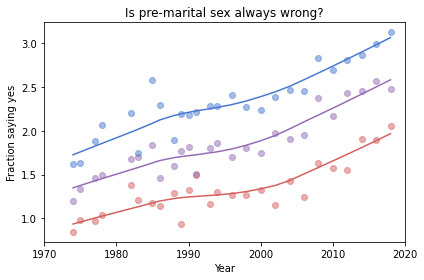

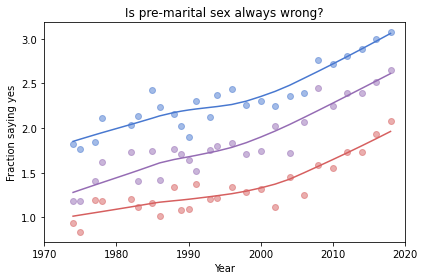

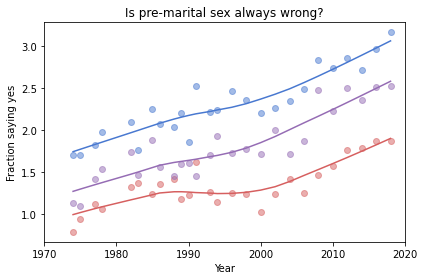

In [ ]:
for key in ['gss0', 'gss1', 'gss2']:
    df = pd.read_hdf('gss_eda.3.hdf5', key)

    plt.figure()
    plot_by_polviews(df)